In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
dados = pd.read_csv("datasus_ano_mes_atendimento.csv", encoding="ISO-8859-1", sep=";", skiprows=3, skipfooter=12, thousands=".", decimal=",", engine="python")
dados2 = pd.read_csv("datasus_ano_mes_processamento.csv", encoding="ISO-8859-1", sep=";", skiprows=3, skipfooter=12, thousands=".", decimal=",", engine="python")

In [5]:
# Selecionando múltiplas colunas (usa-se uma lista [] com mais de um elemento)
dados2[['2016/Ago','2016/Dez']]

,2016/Ago,2016/Dez
0,8.150487e+06,6.961885e+06
1,3.659074e+06,3.264747e+06
2,1.367016e+07,1.117213e+07
3,2.717342e+06,2.379806e+06
4,3.009918e+07,2.914658e+07
5,1.949260e+06,1.853989e+06
6,6.766501e+06,6.245736e+06
7,2.635493e+07,2.054651e+07
8,1.622861e+07,1.539379e+07
9,4.849995e+07,4.395941e+07


In [6]:
# Visualizando os dados das colunas
dados2.columns

Index(['Unidade da Federação', '2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr',
       '2008/Mai', '2008/Jun', '2008/Jul', '2008/Ago', '2008/Set',
       ...
       '2023/Dez', '2024/Jan', '2024/Fev', '2024/Mar', '2024/Abr', '2024/Mai',
       '2024/Jun', '2024/Jul', '2024/Ago', 'Total'],
      dtype='object', length=202)

In [7]:
# Utilizando '.mean()' de modo a exibir apenas os índices sem valores nulos/vazios
dados2.mean(numeric_only=True)

,0
2008/Jan,1.512685e+07
2008/Fev,2.271016e+07
2008/Mar,2.459419e+07
2008/Abr,2.543196e+07
2008/Mai,2.651125e+07
...,...
2024/Mai,7.319611e+07
2024/Jun,7.251213e+07
2024/Jul,7.558435e+07
2024/Ago,7.533484e+07


In [8]:
# Transformando em uma lista de acordo com os índices das colunas
colunas_usaveis = dados2.mean(numeric_only=True).index.tolist()

# Inserindo "Unidade da Federação" no início (índice 0)
colunas_usaveis.insert(0, "Unidade da Federação")

# Exibindo apenas os 5 primeiros itens da lista
colunas_usaveis[:5]

['Unidade da Federação', '2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr']

In [9]:
# Selecionando apenas as colunas usáveis
dados_usaveis = dados2[colunas_usaveis]

# Removendo a linha 'Total'
dados_usaveis = dados_usaveis.drop("Total", axis=1)

# Aplicando o método '.head()' nas colunas usáveis
dados_usaveis.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,2024/Jul,2024/Ago
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,11563989.34,10285428.64,12839765.04,11404441.80,12650347.02,11621160.07,13227789.61,14530979.75,14397621.45,13582796.81
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,5712687.05,3503827.09,4308072.76,4092197.71,4819515.84,5560094.15,4374108.09,4484207.99,6335660.47,4843306.50
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,18978844.09,14875474.44,16497140.19,21053067.92,23549663.31,23454822.33,23233390.29,22504995.88,21887056.69,20165177.57
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3795465.55,2944423.63,2983752.53,3160891.68,3466938.14,2733348.91,3156689.17,3372578.21,2492913.17,3340196.01
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,55893962.12,56139813.00,48849139.60,50671661.28,54205259.14,54632077.92,54159077.44,52962999.91,52418233.49,49525502.38


In [10]:
# É possível perceber que a linha 'Total' foi removida
dados_usaveis.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,2024/Jul,2024/Ago
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,...,1.149621e+08,1.146325e+08,1.222493e+08,1.124649e+08,1.203585e+08,1.232611e+08,1.160477e+08,1.248992e+08,1.273685e+08,1.312901e+08
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,...,2.757579e+07,2.700727e+07,2.837560e+07,2.449435e+07,2.542334e+07,2.715953e+07,2.531263e+07,2.649010e+07,2.826470e+07,2.940529e+07
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,...,2.288098e+07,2.097024e+07,2.364745e+07,2.288853e+07,2.475580e+07,2.617643e+07,2.639414e+07,2.543263e+07,2.687115e+07,2.160401e+07
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,...,4.829554e+07,5.151940e+07,5.164650e+07,4.738856e+07,5.519301e+07,5.584637e+07,5.543399e+07,5.239946e+07,5.894785e+07,5.412421e+07
26,53 Distrito Federal,4745919.19,7632480.67,9647203.26,11098732.99,12891719.72,12850125.67,12565646.74,13710857.89,13165106.20,...,3.081084e+07,2.946529e+07,3.187800e+07,2.949671e+07,3.250038e+07,3.400904e+07,3.427163e+07,3.213844e+07,3.467472e+07,3.639587e+07


In [11]:
# Atribuindo a coluna "Unidade da Federação" como o índice do Dataframe
dados_usaveis = dados_usaveis.set_index("Unidade da Federação")
dados_usaveis.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,2024/Jul,2024/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,...,11563989.34,10285428.64,12839765.04,11404441.80,12650347.02,11621160.07,13227789.61,14530979.75,14397621.45,13582796.81
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,...,5712687.05,3503827.09,4308072.76,4092197.71,4819515.84,5560094.15,4374108.09,4484207.99,6335660.47,4843306.50
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,...,18978844.09,14875474.44,16497140.19,21053067.92,23549663.31,23454822.33,23233390.29,22504995.88,21887056.69,20165177.57
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,3795465.55,2944423.63,2983752.53,3160891.68,3466938.14,2733348.91,3156689.17,3372578.21,2492913.17,3340196.01
15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,24011712.48,...,55893962.12,56139813.00,48849139.60,50671661.28,54205259.14,54632077.92,54159077.44,52962999.91,52418233.49,49525502.38


In [12]:
# Selecionando a coluna com o índice '2019/Ago'
dados_usaveis['2019/Ago'].head()

,2019/Ago
Unidade da Federação,
11 Rondônia,9170787.53
12 Acre,3204998.88
13 Amazonas,15787896.78
14 Roraima,3788154.80
15 Pará,31179893.86


In [13]:
# Selecionando um índice específico de uma linha em dados_usaveis
# É possível notar que o valor é uma Série
dados_usaveis.loc['13 Amazonas']

,13 Amazonas
2008/Jan,4735529.42
2008/Fev,7118990.57
2008/Mar,8196635.49
2008/Abr,8259378.42
2008/Mai,7831399.90
...,...
2024/Abr,23454822.33
2024/Mai,23233390.29
2024/Jun,22504995.88
2024/Jul,21887056.69


In [14]:
# Selecionando através do número referente à linha (chave do índice)
dados_usaveis.iloc[2]

,13 Amazonas
2008/Jan,4735529.42
2008/Fev,7118990.57
2008/Mar,8196635.49
2008/Abr,8259378.42
2008/Mai,7831399.90
...,...
2024/Abr,23454822.33
2024/Mai,23233390.29
2024/Jun,22504995.88
2024/Jul,21887056.69


<Axes: xlabel='Unidade da Federação'>

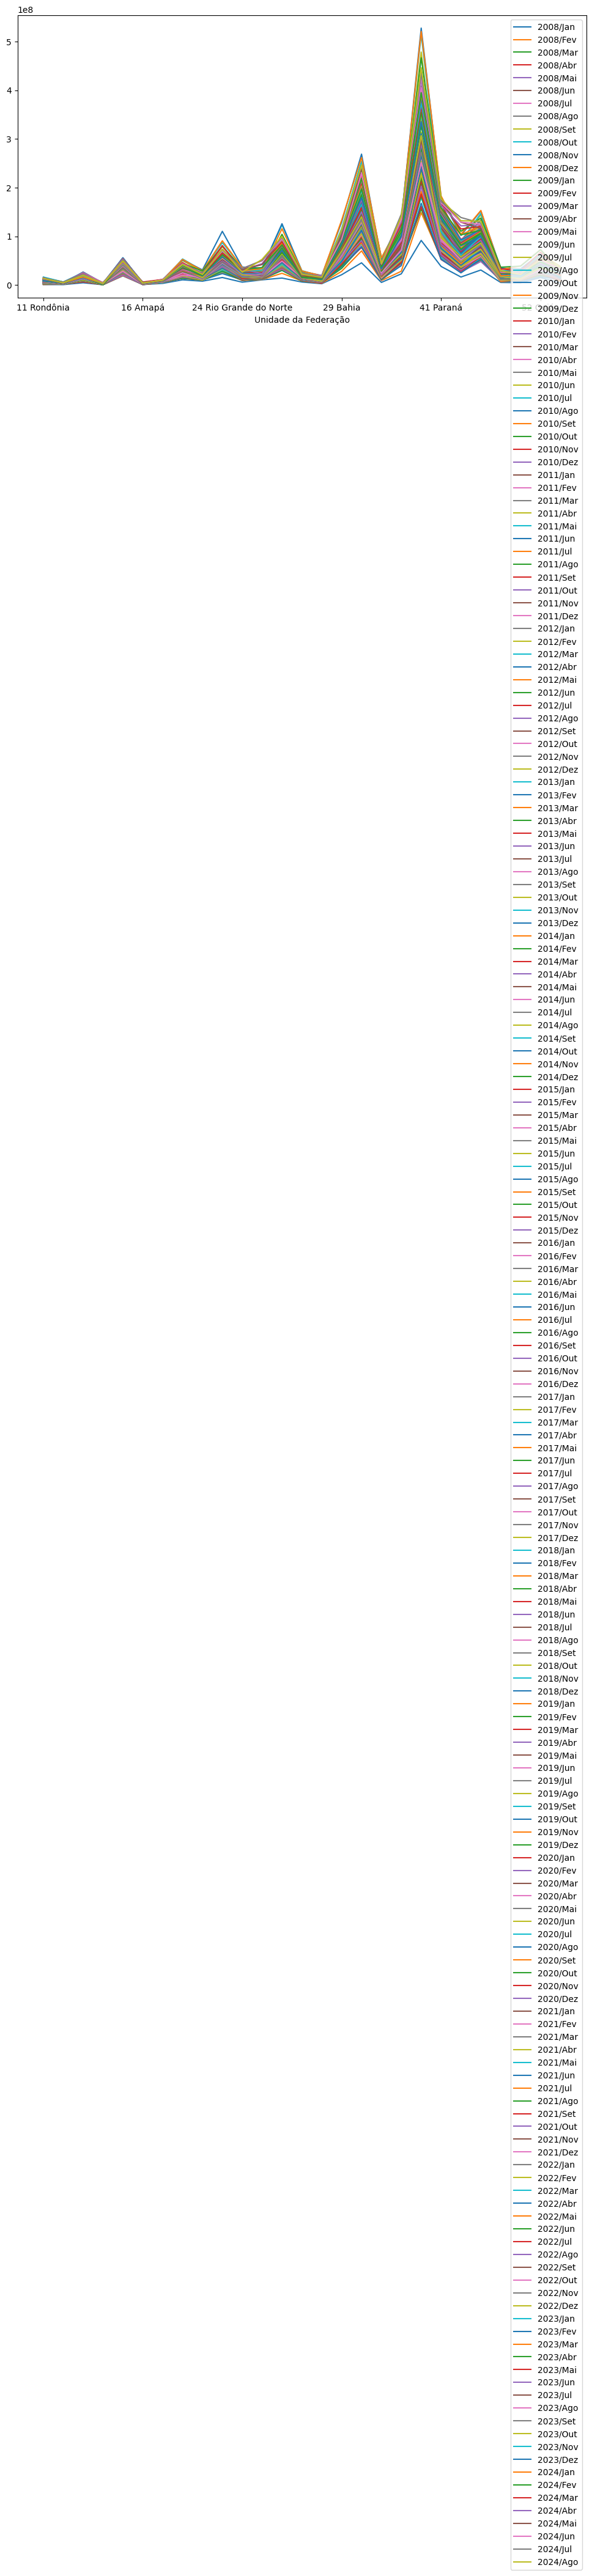

In [15]:
# Plotando o gráfico (linhas diferentes atribuídas para cada coluna) - obs: gráfico ficou ruim, vamos melhorar
dados_usaveis.plot(figsize=(12,6))

In [16]:
# Melhorando o gráfico
# Transpondo os eixos x e y ('.T')
dados_usaveis = dados_usaveis.T

<Axes: >

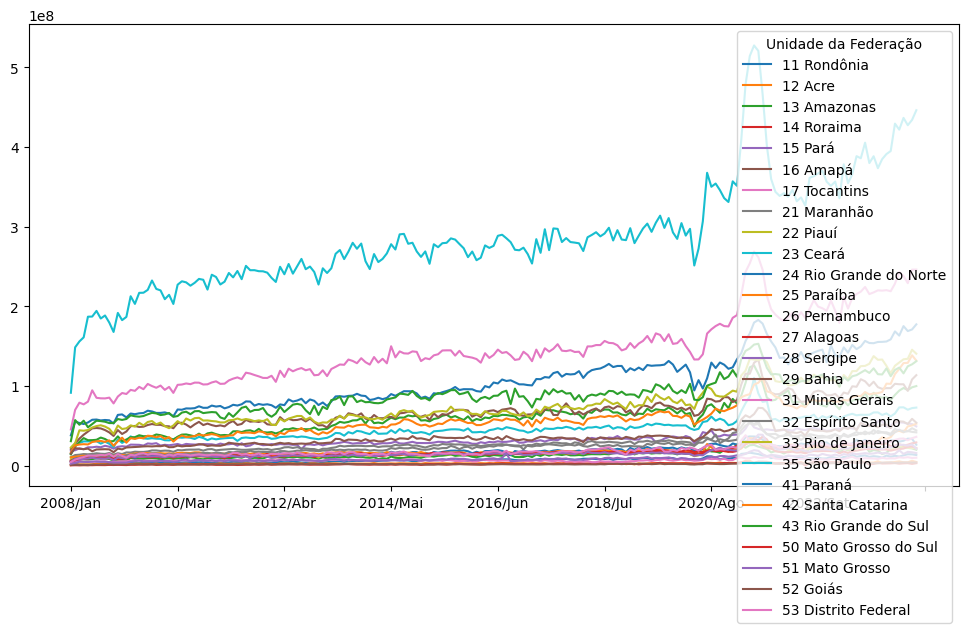

In [17]:
# Plotando um novo gráfico
dados_usaveis.plot(figsize=(12,6))

In [18]:
# Retornando o maior valor por estado (função '.max()')
dados_usaveis.max()

,0
Unidade da Federação,
11 Rondônia,1.649220e+07
12 Acre,6.354514e+06
13 Amazonas,2.690341e+07
14 Roraima,5.171371e+06
15 Pará,5.613981e+07
16 Amapá,6.327228e+06
17 Tocantins,1.183352e+07
21 Maranhão,5.357919e+07
22 Piauí,3.113597e+07


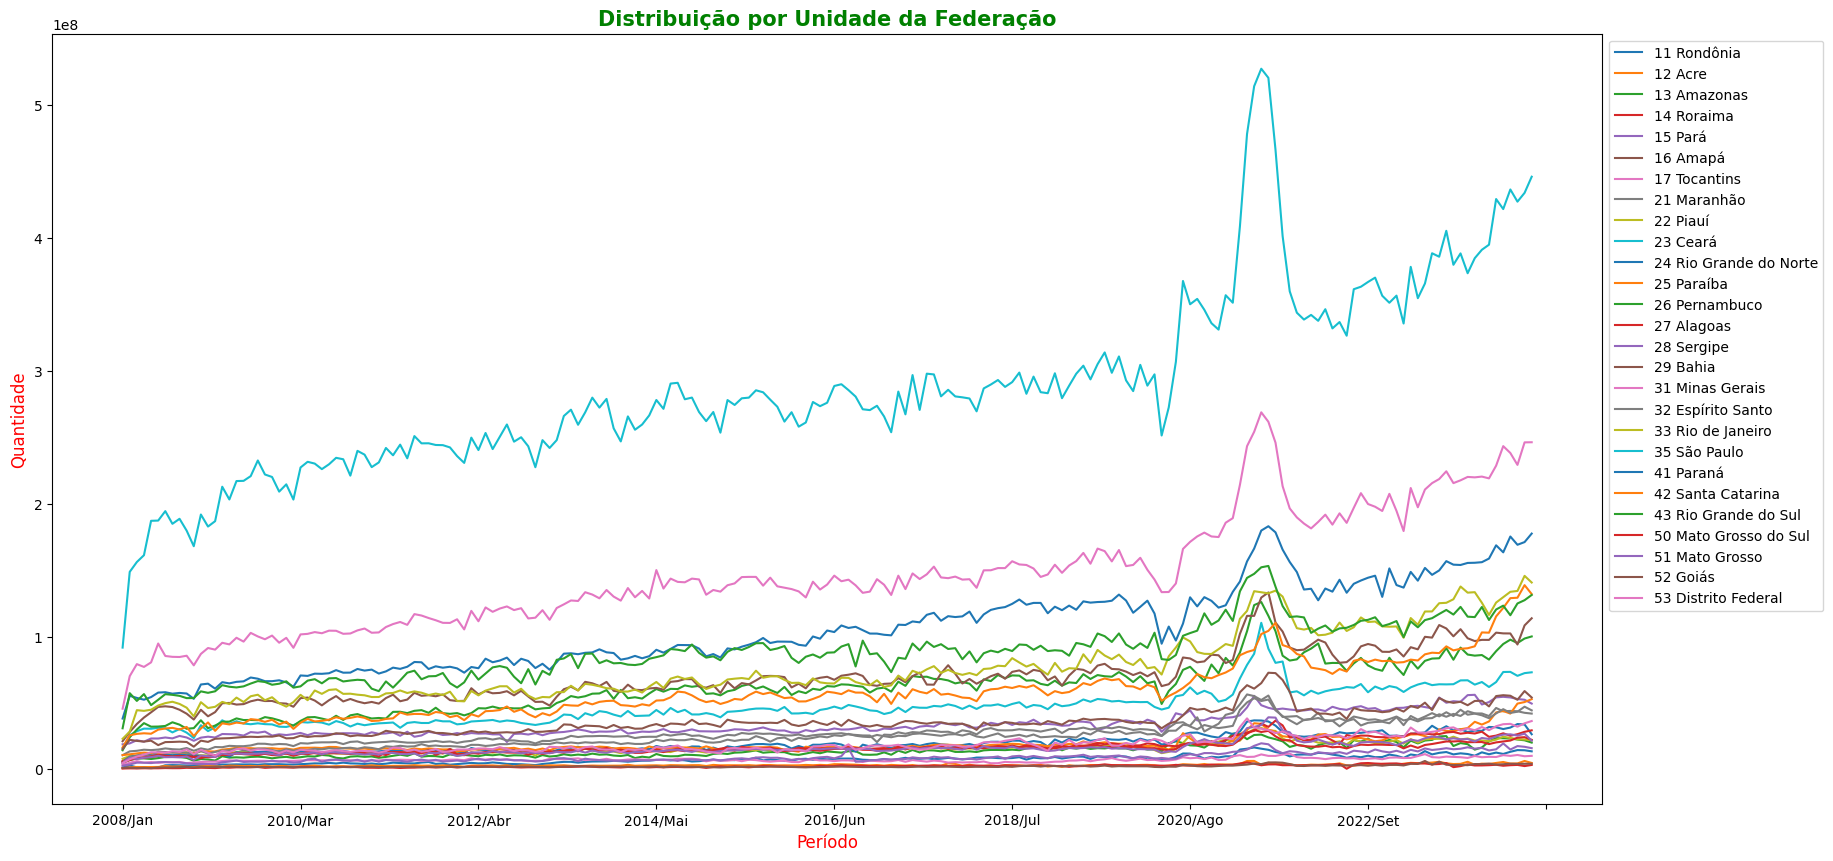

In [19]:
# Retocando o título do gráfico e a legenda - Desafio FIAP
# Definindo a escala do gráfico
novo_grafico = dados_usaveis.plot(figsize=(20,10))

# Definindo o título (nome, fonte, cor e espessura)
novo_grafico.set_title("Distribuição por Unidade da Federação",
                       fontsize=15,      # Tamanho da fonte
                       color='green',    # Cor do título
                       fontweight='bold' # Peso da fonte
                      )

# Inserindo a legenda no local desejado (lado externo esquerdo do gráfico)
novo_grafico.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Inserindo título ao eixo X
novo_grafico.set_xlabel("Período", fontsize=12, color='red')

# Inserindo título ao eixo Y
novo_grafico.set_ylabel("Quantidade", fontsize=12, color='red')

# Exibindo o gráfico
plt.show()


In [20]:
# Transposição do Dataframe
# '.columns' retorna as labels do Dataframe 'dados_usaveis'
# '[:5]' seleciona os 5 primeiros itens da lista
dados_usaveis.T.columns[:5]

Index(['2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai'], dtype='object')

In [21]:
# Uma outra opção seria utilizar '.index'
dados_usaveis.index[:5]

Index(['2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai'], dtype='object')

In [22]:
# Essa opção traria as 5 primeiras linhas
dados_usaveis[:5]

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2008/Jan,1388528.39,902416.00,4735529.42,657889.53,18864744.11,1120973.34,3441592.69,10723506.39,7985142.43,15539821.90,...,5456723.98,23025258.52,9.167847e+07,38266347.46,16504913.45,30931325.46,5377392.11,4795299.01,15310637.29,4745919.19
2008/Fev,2931283.42,1497206.26,7118990.57,777939.31,19553758.20,1268740.33,4985688.85,13559679.41,10079928.25,25735101.55,...,9102212.86,28394310.93,1.486775e+08,55384670.52,25651429.11,57363420.01,7002472.61,8684882.23,22258668.68,7632480.67
2008/Mar,1541682.52,1794028.48,8196635.49,718688.03,21937342.70,974651.24,6205612.60,13985142.36,10298372.45,28724625.75,...,10249595.97,44567062.94,1.560873e+08,53801318.85,26743524.89,51547794.07,8423933.19,7886243.14,21442515.75,9647203.26
2008/Abr,1525314.96,1730469.42,8259378.42,839994.39,20842829.69,1141137.32,4984482.09,14809416.46,10775976.33,30676457.06,...,11253833.56,44054604.82,1.612271e+08,52460306.69,27181488.26,56673338.49,8797487.68,8794109.79,20921212.45,11098732.99
2008/Mai,1645953.84,1819443.92,7831399.90,862347.96,23249952.88,866346.18,5511002.46,14505727.38,10398360.88,30604453.47,...,10198619.17,44911021.15,1.871194e+08,54419620.71,26845308.18,48397733.07,9770421.80,9231645.40,21615970.67,12891719.72


<Axes: xlabel='Unidade da Federação'>

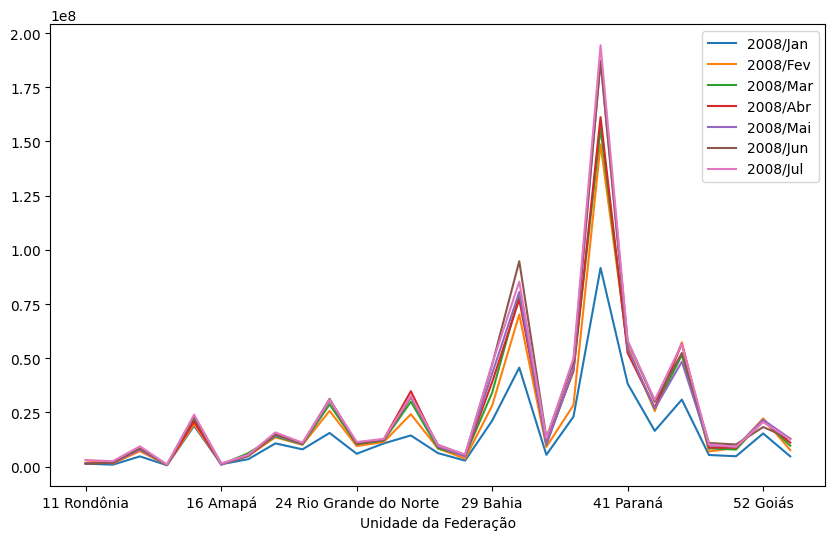

In [23]:
# Escolhendo as 7 primeiras linhas, transpondo e plotando o gráfico ('figsize' indica a escala do gráfico/figura)
dados_usaveis[:7].T.plot(figsize=(10,6))

In [24]:
# Escolhendo uma amostra aleatória do DataFrame 'dados_usaveis'
dados_usaveis.sample() # apenas uma amostra é selecionada

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2018/Jun,8315107.81,3239474.1,14500521.14,3020718.84,35560757.57,2120412.72,5664149.36,29359484.98,16330507.19,47404127.98,...,24431385.84,77683410.8,2.879221e+08,1.221746e+08,62213666.2,90754504.49,17357780.2,15883977.51,35536937.3,21542121.59


In [25]:
dados_usaveis.sample(n=7) # 7 amostras são selecionadas através do parâmetro 'n=7'

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2024/Mar,12650347.02,4819515.84,23549663.31,3466938.14,54205259.14,3580261.72,9320543.87,46229905.34,22390166.31,65737498.24,...,42118693.05,1.255772e+08,4.293397e+08,1.686843e+08,1.151539e+08,1.203585e+08,25423335.19,24755796.19,55193012.55,32500381.42
2011/Fev,3868617.95,2629104.42,8745259.80,1171045.72,26771060.28,1725458.50,6735950.07,20448952.89,11219584.72,34657124.63,...,15161413.45,5.449091e+07,2.310622e+08,7.212862e+07,3.672151e+07,5.888434e+07,9656677.02,11149107.81,26401745.02,12596227.92
2016/Mai,7551313.49,3168503.68,13519252.14,2405520.72,29516894.49,1897437.54,6775391.70,26625097.16,15943858.05,45625574.80,...,24109597.33,6.478854e+07,2.760063e+08,1.045439e+08,5.846242e+07,8.784014e+07,15833939.83,15651536.52,33438193.46,18419489.00
2024/Abr,11621160.07,5560094.15,23454822.33,2733348.91,54632077.92,3880761.58,10713160.33,43725086.35,24619949.12,73315327.77,...,45321872.50,1.296777e+08,4.217851e+08,1.633848e+08,1.215648e+08,1.232611e+08,27159526.89,26176426.42,55846370.59,34009043.94
2013/Mar,5229512.34,2938961.84,10130504.54,1872493.39,27800745.33,1772098.19,7745929.88,22461901.45,13518766.19,37546233.35,...,20294734.35,5.810334e+07,2.478659e+08,8.070373e+07,4.359485e+07,8.249780e+07,13164501.21,13140456.30,29219827.84,16775306.73
2019/Mai,9581970.31,2840630.58,16483166.92,2495491.03,35906526.59,2648904.75,7143806.13,31437580.62,17792232.00,52622124.54,...,27678894.71,8.663717e+07,3.038890e+08,1.264818e+08,6.493771e+07,9.416384e+07,17778458.45,16092716.67,38159986.89,20360779.48
2017/Jul,8438077.45,2348760.00,14376990.41,2878177.60,32771002.63,1881406.55,5837072.54,29321581.70,15389371.73,46353321.61,...,26530798.94,7.530260e+07,2.978814e+08,1.163592e+08,5.724701e+07,9.617453e+07,16956118.78,16372281.19,34374096.65,15143253.69


<Axes: xlabel='Unidade da Federação'>

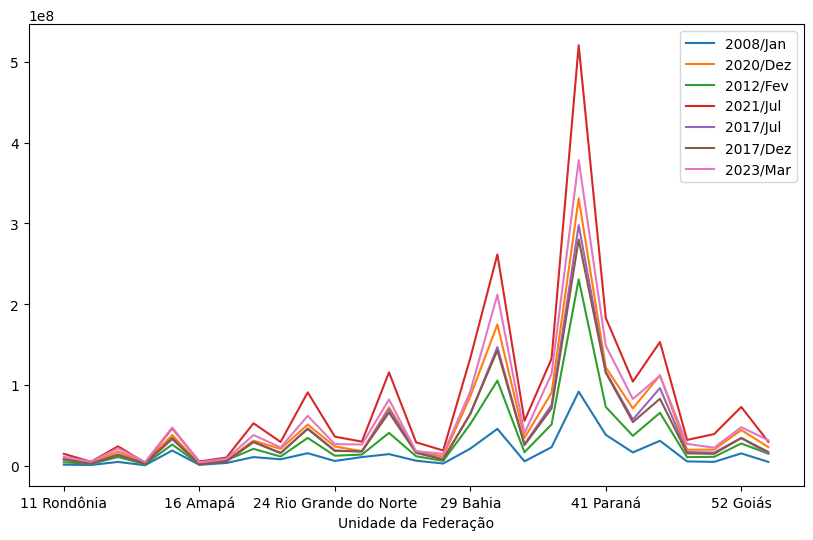

In [26]:
# Escolhendo uma amostragem aleatória, transpondo e plotando o gráfico ('figsize' indica a escala do gráfico/figura)
dados_usaveis.sample(7).T.plot(figsize=(10,6))

In [27]:
# importando numpy
import numpy as np

In [28]:
# Definindo um número aleatório para gerar a 'semente'
# Usa-se o pacote 'random' da biblioteca numpy e o método 'seed()'
np.random.seed(524387) # Configurando a aleatoriedade através de um parâmetro (524387 -> n° aleatório)

In [29]:
# Implicando, então, na aleatoriedade
dados_usaveis.sample(n=7)

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2023/Nov,11563989.34,5712687.05,18978844.09,3795465.55,55893962.12,3159644.32,8625420.22,43783762.51,23220140.98,67067447.84,...,41162200.95,1.330424e+08,3.734888e+08,1.554091e+08,91183911.60,1.149621e+08,27575792.21,22880977.91,48295540.53,30810835.09
2008/Out,3068430.44,1923886.57,8618318.83,1191770.32,24011712.48,1866748.58,4658414.01,16072219.28,11715943.38,27657898.74,...,12656039.16,4.643491e+07,1.797065e+08,5.712189e+07,31957603.59,5.363771e+07,9547923.55,9677093.95,20621423.04,15048607.23
2016/Ago,8150486.59,3659074.22,13670157.49,2717341.67,30099178.67,1949259.95,6766501.09,26354933.71,16228607.43,48499950.85,...,26725024.24,6.888956e+07,2.855044e+08,1.064554e+08,59500073.33,9.427257e+07,16658359.76,15684802.91,37294503.40,18859728.02
2017/Jan,7820057.09,2821087.89,12819877.21,2331250.21,30754370.21,1875579.06,6041173.17,26153825.19,15107868.39,41682796.39,...,25007676.62,6.206207e+07,2.656676e+08,1.013367e+08,56881263.74,8.110957e+07,16010162.90,14035537.59,32130522.23,17727684.85
2017/Out,8657206.23,4540084.78,14584288.95,2512259.50,34138970.65,2036787.91,5104089.76,28352324.75,15596652.45,48964370.84,...,26309234.34,7.495306e+07,2.857406e+08,1.153320e+08,56883543.13,9.065502e+07,15488155.75,16146542.89,34270824.00,18041562.15
2021/Abr,15563729.11,6307616.67,22733131.00,5171370.92,46662714.56,3622062.04,9365632.90,50406725.35,27410286.55,78634779.04,...,56417132.95,1.193017e+08,4.782918e+08,1.565446e+08,88356325.96,1.441607e+08,27778969.31,31098888.85,63380067.96,38410115.30
2012/Mai,4619267.68,2856559.74,10955256.77,2135433.72,27046198.36,1934889.49,7394948.64,23485362.14,13129897.87,36728767.46,...,17628111.36,5.930855e+07,2.532359e+08,8.333699e+07,43805455.91,7.217990e+07,12443933.58,12437326.25,28508546.81,15623435.15


<Axes: xlabel='Unidade da Federação'>

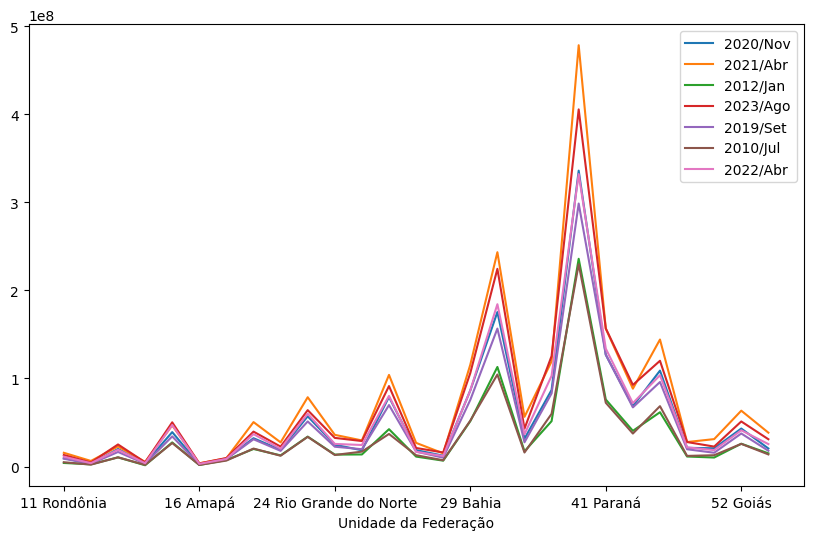

In [30]:
# Novamente: escolhendo uma amostragem aleatória, transpondo e plotando o gráfico ('figsize' indica a escala do gráfico/figura)
# Nota-se que os estados não serão os mesmos do gráfico anterior -> graças ao '.seed()'
dados_dos_7_estados = dados_usaveis.sample(7)
dados_dos_7_estados.T.plot(figsize=(10,6))

In [31]:
# Criando uma nova coluna ('Total') e atribuindo os valores da soma de cada coluna para cada linha
dados_usaveis["Total"] = dados_usaveis.sum(axis = 1) # Verificar última coluna
dados_usaveis.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal,Total
2008/Jan,1388528.39,902416.00,4735529.42,657889.53,18864744.11,1120973.34,3441592.69,10723506.39,7985142.43,15539821.90,...,23025258.52,9.167847e+07,38266347.46,16504913.45,30931325.46,5377392.11,4795299.01,15310637.29,4745919.19,4.084249e+08
2008/Fev,2931283.42,1497206.26,7118990.57,777939.31,19553758.20,1268740.33,4985688.85,13559679.41,10079928.25,25735101.55,...,28394310.93,1.486775e+08,55384670.52,25651429.11,57363420.01,7002472.61,8684882.23,22258668.68,7632480.67,6.131743e+08
2008/Mar,1541682.52,1794028.48,8196635.49,718688.03,21937342.70,974651.24,6205612.60,13985142.36,10298372.45,28724625.75,...,44567062.94,1.560873e+08,53801318.85,26743524.89,51547794.07,8423933.19,7886243.14,21442515.75,9647203.26,6.640431e+08
2008/Abr,1525314.96,1730469.42,8259378.42,839994.39,20842829.69,1141137.32,4984482.09,14809416.46,10775976.33,30676457.06,...,44054604.82,1.612271e+08,52460306.69,27181488.26,56673338.49,8797487.68,8794109.79,20921212.45,11098732.99,6.866629e+08
2008/Mai,1645953.84,1819443.92,7831399.90,862347.96,23249952.88,866346.18,5511002.46,14505727.38,10398360.88,30604453.47,...,44911021.15,1.871194e+08,54419620.71,26845308.18,48397733.07,9770421.80,9231645.40,21615970.67,12891719.72,7.158036e+08


<Axes: xlabel='Unidade da Federação'>

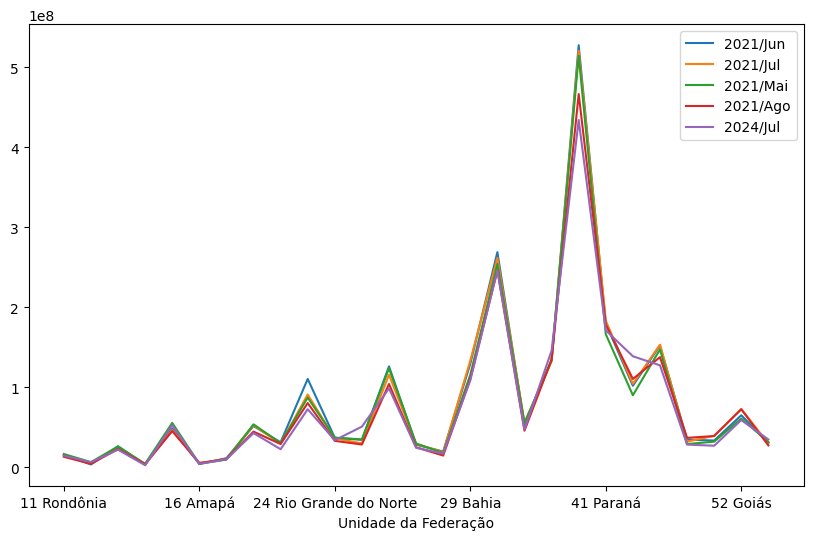

In [32]:
# DESAFIO
# - ordenar nosso DataFrame para que na primeira linha tenha a linha com maior gasto, e na última com menor gasto (ordenação) -> em outras palavras: inserir ordem decrescente
df_ordenado = dados_usaveis.sort_values(by='Total', ascending=False)
df_ordenado = df_ordenado.drop("Total", axis=1) # removendo a coluna 'Total
# df_ordenado.drop("Total", axis=1, inplace=True)

df_ordenado.head(5).T.plot(figsize=(10,6))

In [33]:
df_ordenado.T.head()

,2021/Jun,2021/Jul,2021/Mai,2021/Ago,2024/Jul,2021/Abr,2024/Ago,2024/Mai,2024/Jun,2024/Abr,...,2008/Jun,2008/Ago,2009/Jan,2008/Out,2008/Mai,2008/Abr,2008/Nov,2008/Mar,2008/Fev,2008/Jan
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,15572901.51,14742747.37,16492196.14,13054732.77,14397621.45,15563729.11,13582796.81,13227789.61,14530979.75,11621160.07,...,1406150.68,3231494.61,2885269.07,3068430.44,1645953.84,1525314.96,2825838.52,1541682.52,2931283.42,1388528.39
12 Acre,3461663.11,4979239.30,6354514.15,4138751.64,6335660.47,6307616.67,4843306.50,4374108.09,4484207.99,5560094.15,...,1828496.00,2089107.14,2497116.43,1923886.57,1819443.92,1730469.42,1756986.80,1794028.48,1497206.26,902416.00
13 Amazonas,26200089.42,24066337.32,25882861.87,22720450.82,21887056.69,22733131.00,20165177.57,23233390.29,22504995.88,23454822.33,...,8477273.62,9352532.70,7403068.36,8618318.83,7831399.90,8259378.42,6555549.08,8196635.49,7118990.57,4735529.42
14 Roraima,3103979.88,3743330.65,4266254.94,3781921.16,2492913.17,5171370.92,3340196.01,3156689.17,3372578.21,2733348.91,...,832440.66,894271.18,1085679.25,1191770.32,862347.96,839994.39,1056218.71,718688.03,777939.31,657889.53
15 Pará,48295002.33,46336237.30,55352070.66,45126860.59,52418233.49,46662714.56,49525502.38,54159077.44,52962999.91,54632077.92,...,23240687.56,23341218.03,24613320.93,24011712.48,23249952.88,20842829.69,21526303.70,21937342.70,19553758.20,18864744.11


In [34]:
df_ordenado.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2021/Jun,15572901.51,3461663.11,26200089.42,3103979.88,48295002.33,3967128.98,11262768.61,51476584.09,31135971.40,1.103423e+08,...,52214129.02,1.333132e+08,5.274393e+08,1.797773e+08,1.018780e+08,1.521258e+08,34526664.72,33338909.05,64916492.41,30629361.48
2021/Jul,14742747.37,4979239.30,24066337.32,3743330.65,46336237.30,5215333.80,10159174.66,52577550.99,29451460.79,9.087077e+07,...,55588132.78,1.325242e+08,5.205714e+08,1.830431e+08,1.042609e+08,1.531463e+08,31984745.11,39215412.56,72752320.44,29662716.67
2021/Mai,16492196.14,6354514.15,25882861.87,4266254.94,55352070.66,4388127.81,9511274.51,53579187.88,30173706.38,8.702418e+07,...,55162721.74,1.341345e+08,5.142569e+08,1.662299e+08,8.992818e+07,1.472001e+08,28963920.87,31974225.98,60776098.70,31532816.86
2021/Ago,13054732.77,4138751.64,22720450.82,3781921.16,45126860.59,5269329.19,10136608.55,44466565.18,28954296.01,8.020369e+07,...,45641859.94,1.345484e+08,4.664200e+08,1.784395e+08,1.103278e+08,1.375615e+08,36713343.08,38962584.02,72468238.27,27288766.94
2024/Jul,14397621.45,6335660.47,21887056.69,2492913.17,52418233.49,4225767.00,9887749.57,42593206.65,22513293.80,7.246275e+07,...,47185079.12,1.456739e+08,4.339883e+08,1.711073e+08,1.386766e+08,1.273685e+08,28264696.17,26871149.36,58947851.30,34674715.63


In [35]:
df_ordenado.columns

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [36]:
# Criando um dicionário de regiões
regioes = {
    "Norte": ["11 Rondônia", "12 Acre", "13 Amazonas", "14 Roraima", "15 Pará", "16 Amapá", "17 Tocantins"],
    "Nordeste": ["21 Maranhão", "22 Piauí", "23 Ceará", "24 Rio Grande do Norte", "25 Paraíba", "26 Pernambuco", "27 Alagoas", "28 Sergipe", "29 Bahia"],
    "Centro-Oeste": ["50 Mato Grosso do Sul", "51 Mato Grosso", "52 Goiás", "53 Distrito Federal"],
    "Sudeste": ["31 Minas Gerais", "32 Espírito Santo", "33 Rio de Janeiro", "35 São Paulo"],
    "Sul": ["41 Paraná", "42 Santa Catarina", "43 Rio Grande do Sul"]
}

# Criação de um novo DataFrame para armazenar os dados por região
# A função 'pd.DataFrame()' do Pandas é usada para criar um DataFrame
df_regioes = pd.DataFrame()

In [37]:
# Agrupando os valores das colunas por região
for regiao, estados in regioes.items():
    df_regioes[regiao] = df_ordenado[estados].sum(axis=1)

# Exibindo as 5 primeiras linhas
df_regioes.head()

,Norte,Nordeste,Centro-Oeste,Sudeste,Sul
2021/Jun,1.118635e+08,5.670993e+08,1.634114e+08,9.817543e+08,4.337811e+08
2021/Jul,1.092424e+08,5.354788e+08,1.736152e+08,9.703473e+08,4.404503e+08
2021/Mai,1.222473e+08,5.289951e+08,1.532471e+08,9.576695e+08,4.033581e+08
2021/Ago,1.042287e+08,4.689417e+08,1.754329e+08,8.925588e+08,4.263287e+08
2024/Jul,1.116450e+08,4.702111e+08,1.487584e+08,8.730106e+08,4.371524e+08


In [38]:
df_ordenado["35 São Paulo"].head()

,35 São Paulo
2021/Jun,5.274393e+08
2021/Jul,5.205714e+08
2021/Mai,5.142569e+08
2021/Ago,4.664200e+08
2024/Jul,4.339883e+08


In [39]:
# Desafio: adicionar o seu estado.
df_concatenado = pd.concat([df_regioes, df_ordenado["35 São Paulo"]], axis=1) # concatenando a coluna "35 São Paulo" com o DataFrame 'df_regiões'
df_concatenado.head(10) # exibindo as 10 primeiras linhas


,Norte,Nordeste,Centro-Oeste,Sudeste,Sul,35 São Paulo
2021/Jun,1.118635e+08,5.670993e+08,1.634114e+08,9.817543e+08,4.337811e+08,5.274393e+08
2021/Jul,1.092424e+08,5.354788e+08,1.736152e+08,9.703473e+08,4.404503e+08,5.205714e+08
2021/Mai,1.222473e+08,5.289951e+08,1.532471e+08,9.576695e+08,4.033581e+08,5.142569e+08
2021/Ago,1.042287e+08,4.689417e+08,1.754329e+08,8.925588e+08,4.263287e+08,4.664200e+08
2024/Jul,1.116450e+08,4.702111e+08,1.487584e+08,8.730106e+08,4.371524e+08,4.339883e+08
2021/Abr,1.094263e+08,4.833122e+08,1.606680e+08,8.973190e+08,3.890616e+08,4.782918e+08
2024/Ago,1.058582e+08,4.683491e+08,1.415294e+08,8.775250e+08,4.407792e+08,4.461467e+08
2024/Mai,1.125899e+08,4.511800e+08,1.414124e+08,8.508709e+08,4.202417e+08,4.365418e+08
2024/Jun,1.128023e+08,4.510143e+08,1.364606e+08,8.343467e+08,4.232036e+08,4.273769e+08
2024/Abr,1.125954e+08,4.532358e+08,1.431914e+08,8.401142e+08,4.082106e+08,4.217851e+08


In [40]:
# Desafio: adicionar o seu estado.
# Desafio: deixar o gráfico mais refinado.
# Desafio: pesquisar o 'sort_index'.
# Desafio: googlar os casos de dengue no Brasil e verificar se existe algum padrão com os gastos encontrados aqui.
# Desafio: plotar somente os estados de uma região do Brasil.

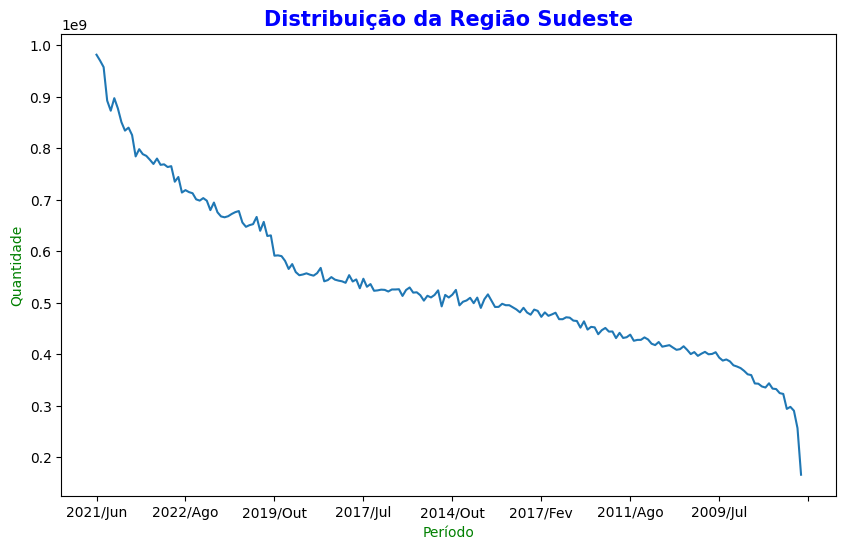

In [41]:
# Gráfico da Região Sudeste
sudeste = df_regioes["Sudeste"].plot(figsize=(10,6))

# Ajustando o título
sudeste.set_title("Distribuição da Região Sudeste",
                       fontsize=15,      # Tamanho da fonte
                       color='blue',    # Cor do título
                       fontweight='bold' # Peso da fonte
                      )

# Inserindo título ao eixo X
sudeste.set_xlabel("Período", fontsize=10, color='green')

# Inserindo título ao eixo Y
sudeste.set_ylabel("Quantidade", fontsize=10, color='green')

# Exibindo o gráfico
plt.show()

In [42]:
# colunas_ordenadas = dados_usaveis.sum().sort_values(ascending=False).index
colunas_ordenadas = dados_usaveis.sum().sort_values(ascending=False).index # somando os valores de cada coluna, ordenando os valores e retornando o índice
dados_usaveis[colunas_ordenadas].head().drop("Total", axis=1) # removendo a coluna "Total"

Unidade da Federação,35 São Paulo,31 Minas Gerais,41 Paraná,43 Rio Grande do Sul,33 Rio de Janeiro,29 Bahia,26 Pernambuco,42 Santa Catarina,23 Ceará,52 Goiás,...,22 Piauí,51 Mato Grosso,27 Alagoas,13 Amazonas,28 Sergipe,11 Rondônia,17 Tocantins,12 Acre,14 Roraima,16 Amapá
2008/Jan,9.167847e+07,45671659.76,38266347.46,30931325.46,23025258.52,21211522.47,14393949.89,16504913.45,15539821.90,15310637.29,...,7985142.43,4795299.01,6243726.32,4735529.42,2780750.11,1388528.39,3441592.69,902416.00,657889.53,1120973.34
2008/Fev,1.486775e+08,70194037.10,55384670.52,57363420.01,28394310.93,28189304.95,24181400.95,25651429.11,25735101.55,22258668.68,...,10079928.25,8684882.23,8376622.16,7118990.57,3676483.16,2931283.42,4985688.85,1497206.26,777939.31,1268740.33
2008/Mar,1.560873e+08,79231336.95,53801318.85,51547794.07,44567062.94,34181483.52,29991302.71,26743524.89,28724625.75,21442515.75,...,10298372.45,7886243.14,8408336.22,8196635.49,5051473.61,1541682.52,6205612.60,1794028.48,718688.03,974651.24
2008/Abr,1.612271e+08,77136537.58,52460306.69,56673338.49,44054604.82,39026934.13,34806197.97,27181488.26,30676457.06,20921212.45,...,10775976.33,8794109.79,9090794.82,8259378.42,5046063.36,1525314.96,4984482.09,1730469.42,839994.39,1141137.32
2008/Mai,1.871194e+08,80554440.63,54419620.71,48397733.07,44911021.15,42949566.82,32147987.35,26845308.18,30604453.47,21615970.67,...,10398360.88,9231645.40,9338771.45,7831399.90,4741151.56,1645953.84,5511002.46,1819443.92,862347.96,866346.18


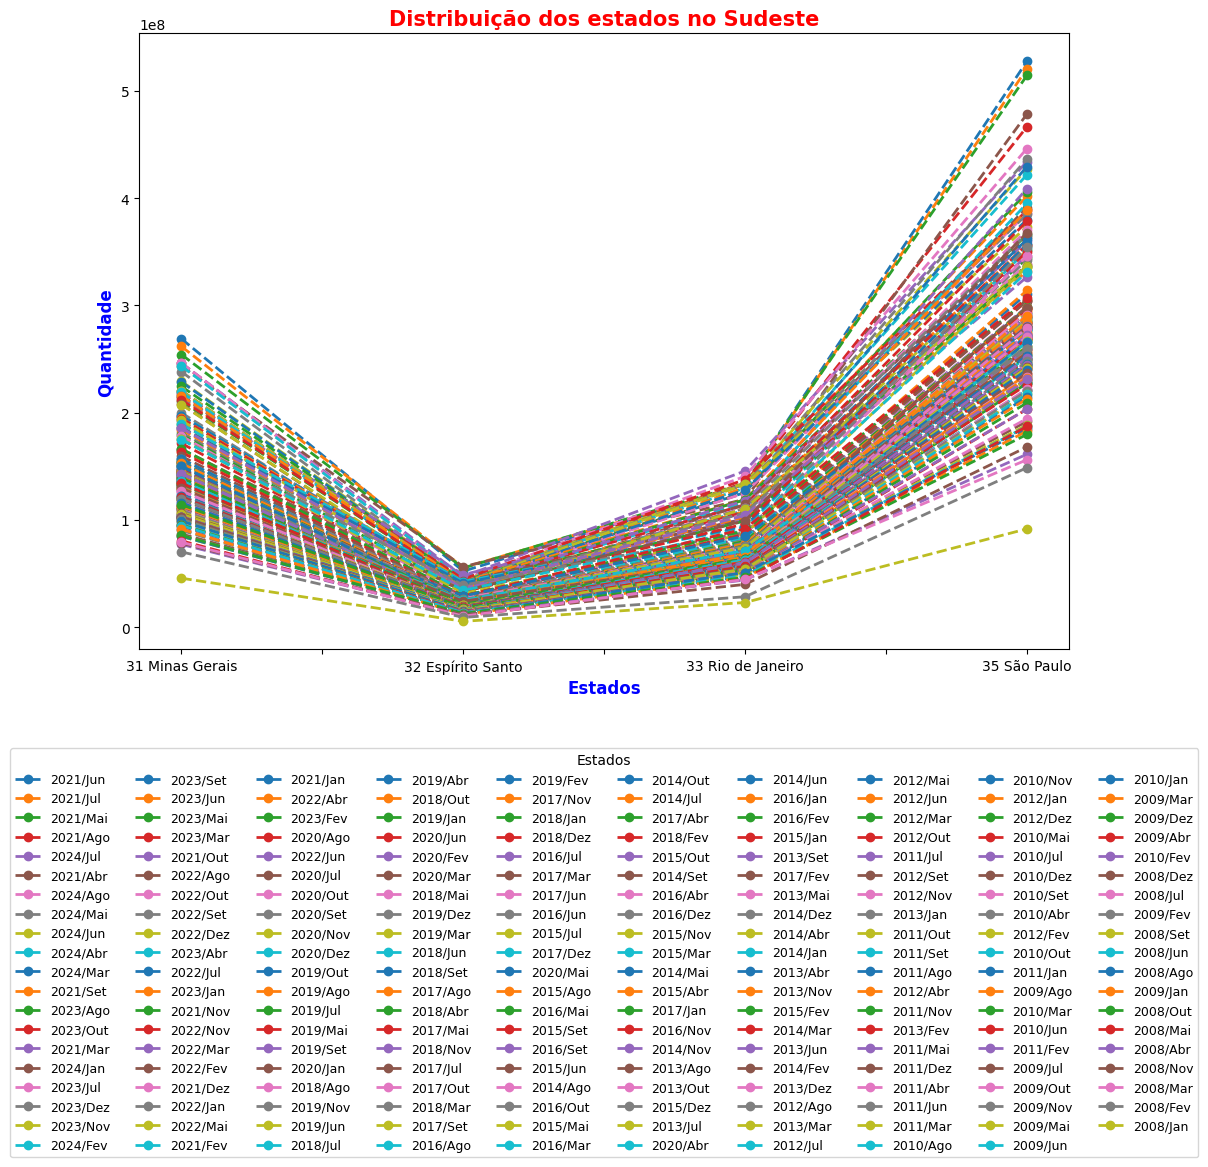

In [43]:
regi = regioes["Sudeste"]
grafico_sudeste = df_ordenado[regi].T

# Especificando as cores e o estilo das linhas para destacar melhor os dados
grafico_sudeste2 = grafico_sudeste.plot(figsize=(12,8), linewidth=2, linestyle='--', marker='o')

# Alterando o título e sua fonte
grafico_sudeste2.set_title("Distribuição dos estados no Sudeste", fontsize=15, color='red', fontweight='bold')

# Definindo os rótulos dos eixos
grafico_sudeste2.set_xlabel("Estados", fontsize=12, color='blue', fontweight='bold')
grafico_sudeste2.set_ylabel("Quantidade", fontsize=12, color='blue', fontweight='bold')

# Posicionando a legenda fora do gráfico, em várias colunas e com fonte menor
grafico_sudeste2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=10, fontsize=9, title="Estados")

# Exibindo o gráfico
plt.show()

In [46]:
# Transpondo o DataFrame original
grafico_sudeste = grafico_sudeste.T

# Criando um DataFrame vazio com as mesmas colunas de `grafico_sudeste`
df_anos_soma = pd.DataFrame(columns=grafico_sudeste.columns)

# Iterando pelos anos e calculando a soma para cada ano
for ano in range(2008, 2024):
    # Filtrar as linhas que contêm o ano atual no índice
    df_ano = grafico_sudeste[grafico_sudeste.index.str.contains(str(ano))]

    # Calculando a soma para o ano atual
    soma_ano = df_ano.sum()

    # Adicionando a soma como uma nova linha, com o ano como índice
    df_anos_soma.loc[ano] = soma_ano

print(soma_ano)

Unidade da Federação
31 Minas Gerais      2.525355e+09
32 Espírito Santo    4.835311e+08
33 Rio de Janeiro    1.449883e+09
35 São Paulo         4.497487e+09
dtype: float64


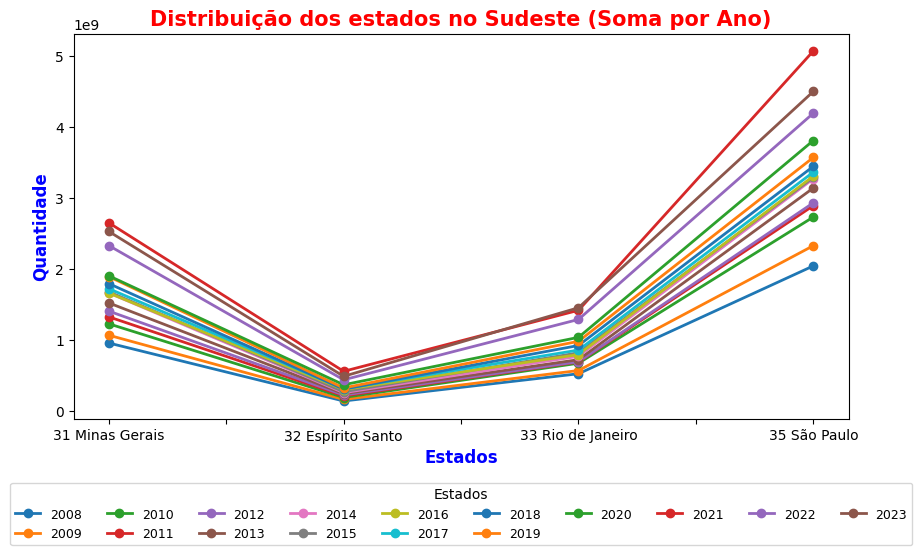

In [50]:
# Gerando o gráfico com base no DataFrame df_anos_soma
grafico_sudeste2 = df_anos_soma.T.plot(figsize=(10,5), linewidth=2, marker='o')

# Alterando o título e sua fonte
grafico_sudeste2.set_title("Distribuição dos estados no Sudeste (Soma por Ano)", fontsize=15, color='red', fontweight='bold')

# Definindo os rótulos dos eixos
grafico_sudeste2.set_xlabel("Estados", fontsize=12, color='blue', fontweight='bold')
grafico_sudeste2.set_ylabel("Quantidade", fontsize=12, color='blue', fontweight='bold')

# Posicionando a legenda fora do gráfico, em várias colunas e com fonte menor
grafico_sudeste2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=10, fontsize=9, title="Estados")

# Exibindo o gráfico
plt.show()